In [1]:

#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
bank_df = pd.read_csv(r"C:\Users\Preeti\Desktop\Data Glacier Internship\Bank_Campaign_Marketing\Dataset\bank-additional-full.csv",sep=";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank_df.shape

(41188, 21)

In [5]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
def nullVal(bank_df):
    missing_num = bank_df.isnull().sum()
    missing_percent = (100 * missing_num / len(bank_df))
    concatinated_value = pd.concat([missing_num, missing_percent], axis = 1)

    missing = concatinated_value.rename(columns = {0:"Missing ", 1:"Percent of Missing Values"})
    in_sorted_order = missing[missing.iloc[:,1]!=0].sort_values(by= 'Percent of Missing Values', ascending = False).round(1)
    print("Full Bank Data has a total of '{}' coloumns from which the '{}' coloumns are having missing values.".format(bank_df.shape[1],in_sorted_order.shape[0]))
    return in_sorted_order
missing_num = nullVal(bank_df)

Full Bank Data has a total of '21' coloumns from which the '0' coloumns are having missing values.


<AxesSubplot: >

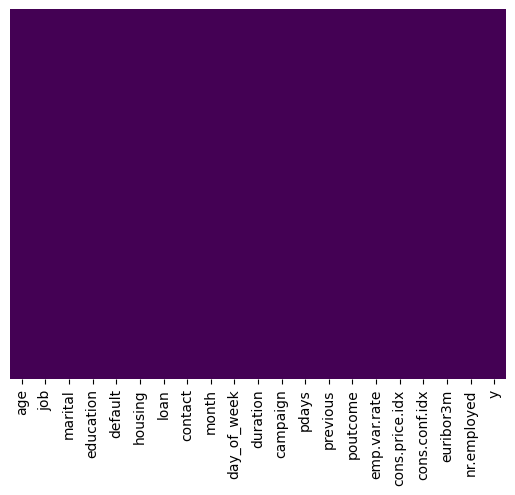

In [38]:
sns.heatmap(bank_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [39]:
c = 0;

for col in bank_df:
    if bank_df[col].dtype == 'object':
        if len(list(bank_df[col].unique())) <= 2:
            l = preprocessing.LabelEncoder()
            bank_df[col] = l.fit_transform(bank_df[col])
            c = c + 1;
            print(col)

In [41]:
bank_df.shape


(41188, 21)

In [42]:

bank_df= pd.get_dummies(bank_df)
bank_df.shape


(41188, 63)

In [48]:
X= bank_df.iloc[:,:--1]
y= bank_df.iloc[:,-1]

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Writing the method for the Classification result, and the matrix

In [57]:
def print_score(classification, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_train,classification.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, classification.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, classification.predict(X_train))))

        res = cross_val_score(classification, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        print("Test Result:\n")
        print("Accuracy score: {0:.4f}\n".format(accuracy_score(y_test,classification.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, classification.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test,classification.predict(X_test))))

In [58]:

standarScaler= StandardScaler()
X_train = standarScaler.fit_transform(X_train)
X_test = standarScaler.transform(X_test)

In [59]:
smote = SMOTE(random_state=15, sampling_strategy= 1.0)
x_train_right , y_train_right = smote.fit_resample(X_train,y_train)

### Logistic Regression

In [60]:
logistic_reg = LogisticRegression( C = 0.0001, random_state=21)
logistic_reg.fit(x_train_right,y_train_right)

LogisticRegression(C=0.0001, random_state=21)

In [61]:
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=True)

Train Result:

Accuracy score: 0.5118

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.61      0.56     31860
           1       0.51      0.41      0.46     31860

    accuracy                           0.51     63720
   macro avg       0.51      0.51      0.51     63720
weighted avg       0.51      0.51      0.51     63720


Confusion Matrix: 
 [[19408 12452]
 [18657 13203]]

Average Accuracy: 	 0.5118
Accuracy SD: 		 0.0048


#### Accuracy is 58%

In [62]:
#Now let's set train = False, to see the result
print_score(logistic_reg, x_train_right, y_train_right, X_test, y_test, train=False)

Test Result:

Accuracy score: 0.5994

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.61      0.75      7955
           1       0.03      0.39      0.06       283

    accuracy                           0.60      8238
   macro avg       0.50      0.50      0.40      8238
weighted avg       0.93      0.60      0.72      8238


Confusion Matrix: 
 [[4827 3128]
 [ 172  111]]



### Random Forest Model

In [63]:
# Now we use RandomForestClassifier method to see the recall and precission difference

classification_report_random_forest = RandomForestClassifier(n_estimators=40,random_state=21)
classification_report_random_forest.fit(x_train_right,y_train_right)

RandomForestClassifier(n_estimators=40, random_state=21)

In [64]:
print_score(classification_report_random_forest,x_train_right,y_train_right, X_test,y_test, train= False)

Test Result:

Accuracy score: 0.7325

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.74      0.84      7955
           1       0.06      0.42      0.10       283

    accuracy                           0.73      8238
   macro avg       0.51      0.58      0.47      8238
weighted avg       0.94      0.73      0.82      8238


Confusion Matrix: 
 [[5914 2041]
 [ 163  120]]



#### Accuracy is 73%

### Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtcprediction = dtc.predict(X_test)

In [66]:
print_score(dtc,x_train_right,y_train_right, X_test,y_test, train= False)

Test Result:

Accuracy score: 0.9656

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7955
           1       0.50      0.00      0.01       283

    accuracy                           0.97      8238
   macro avg       0.73      0.50      0.49      8238
weighted avg       0.95      0.97      0.95      8238


Confusion Matrix: 
 [[7954    1]
 [ 282    1]]



#### Accuracy is 96%

### The best model is Decision tree classifier model